<a href="https://colab.research.google.com/github/LordLean/Machine-Learning/blob/master/ML_Labs/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seminar Week 3: Pre-processing

There are two streams for this lab session: (i) some Python tutorial covering random number generation, some basic plotting, and matrix operations; (ii) some questions on pre-processing. 

You should choose yourself which part you want to focus on during the 1 hour class. Part 2 does follow on from the part 1, but some of you might prefer to not have all the details right now, and focus just on using toolboxes to answer the questions in part 2. If you want to write your own code for part 2, then part 1 might be useful.

However you approach this lab, you should be generally getting familiar with Python and the toolboxes that are available for doing machine learning.

Start by importing the libraries we'll use:

In [0]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import scipy.linalg as linalg

# Part 1 - Tutorial: Random number generation, basic plotting, matrix operations

## Random number generation

Here is how to generate data that are normally distributed, and plot with a basic histogram. Have a play around with the parameters.

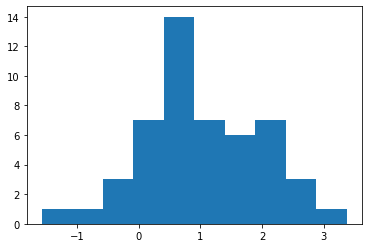

In [0]:
# Generate 1D data from normal distribution
nbpts = 50 # Number of points to generate
mu = 1 # the mean
sigma = 2 # the standard deviation

data = np.random.normal(mu,sigma,(nbpts,1)) # makes a column vector

# Create histogram. By default, this will show how many points fall in each bin. 
bins = 10 # This specifies the number of bins, Python decides the interval. This can be OK but means you do not specify exactly where the bins are. 
plt.hist(data, bins) 
plt.show()

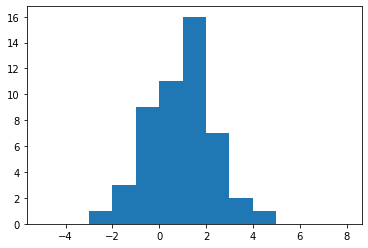

In [0]:
# A different specification
edges = np.linspace(-5,8,14) # This specifies the number of bins and also where the first bin starts from
plt.hist(data, edges)
plt.show()

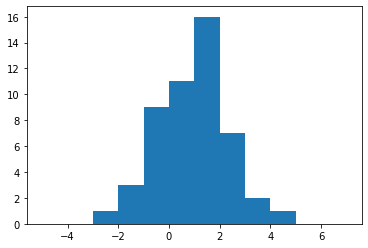

In [0]:
# Another specification
binsize = 1
edges = np.arange(-5,8,binsize) # This specifies a sequence defining the left edge of each bin (and, indirectly, the number of bins) 
plt.hist(data,edges)
plt.show()

Next let's do a normalised histogram.

We are using histograms to estimate probability densities. We need to remember that a probability density function has an area under the curve of 1 (when integrating over all values) so in order to be able to compare histogram and probability density function, we need to normalise our histograms.


In [0]:
binsize = 1
edges = np.arange(-5,8,binsize) # varying the step size in the sequence means changing the number of bins. Consider what happens when changing the value of binsize
plt.hist(data, edges, normed=True)

In [0]:
# Now we can superimpose the pdf (probability density function) of the normal distribution we used to generate the data. We will plot it in the same range as covered by our edges
binsize = 1
edges = np.arange(-5,8,binsize) # varying the step size in the sequence means changing the number of bins. Consider what happens when changing the value of binsize
plt.hist(data, edges, normed=True)
x = np.arange(-5,8,0.05) # the x values over which I want the PDF
y = stats.norm.pdf(x,mu,sigma)
plt.plot(x,y,'r-') # plot with red line
plt.show()

The first thing to be clear about is that if you draw data from a distribution, the smaller the number of samples, the less likely you are to be able to accurately estimate the distribution.  A simple example is as follows.  Say I have a biased coin (e.g., a coin that returns heads a bit more often than tails).  I know it’s biased but you don’t.  If I only let you throw it 5 times, how likely are you to be able to infer that it is biased?  What if I let you throw it 100 times?  A million times?  The more you can sample, the more your estimated probability density converges to the true probability density.

### Optional homework

Try generating and plotting some data from another 1-d probability distribution, such as a uniform distribution and/or a log-normal distribution

## Multivariate normal (Gaussian) distribution 

Now let's see how to generate data from a multivariate normal (Gaussian) distribution

In [0]:
nbpts=100 # number of data points to generate

mu=[4,5] # mean of x and mean of y
sigma=[1,2] # standard deviation of x and standard deviation of y
corr=0.7 # correlation between x and y. This lies between -1 and 1.
cov=corr*sigma[0]*sigma[1]  #covariance, which is correlation times the 2 std devs.

C=[[sigma[0]**2,cov],[cov,sigma[1]**2]] #  covariance matrix

data=np.random.multivariate_normal(mu,C,nbpts)

Produce a scatter plot

In [0]:
plt.scatter(data[:,0],data[:,1])

### Optional homework

Play around with different ways of visualising 2-d Gaussian data such as that just plotted above.

## Matrix operations

Matrices are written as lists of rows, and vectors simply as lists. For full functionality, they should be declared as numpy arrays. So for example

$A=\left( \begin{array}{cc} 2 & 1 \\ 4 & 3 \end{array} \right)$

$B=\left( \begin{array}{cc} 5 & 2 \\ 2 & 2 \end{array} \right)$

$v=\left( \begin{array}{c} 2 \\ 1 \end{array} \right)$

can be written as:

In [0]:
A=np.array([[2,1],[4,3]])
B=np.array([[5,2],[2,2]])
v=np.array([2,1])

Matrix-vector multiplication and matrix-matrix multiplication are done as follows

In [0]:
np.dot(A,v)

In [0]:
np.dot(A,B)

Transpose

In [0]:
A.T

Eigenvalues and eigenvectors. The following returns an array (not diagonal matrix) of lambda (eigenvalues) and U (eigenvector matrix). The first column corresponds to the first eigenvalue etc.

Eigenvectors are normalised to be length 1.

(j here is the square root of -1. Eigenvalues and eigenvectors can have complex number entries.)

In [0]:
[lambda_arr,U] = linalg.eig(B) # 
print(lambda_arr)
print(U)

# Part 2: Pre-processing

Here, we will look into normalisation and PCA. We will be working with two-dimensional
data as it is much easier to visualise, however, it is important that any function you write can be generalised
to an arbitrary number of dimensions.

For each of these questions, you can consider writing your own code but it's OK if you don't.

Pre-processing package of sklearn:

https://scikit-learn.org/stable/modules/preprocessing.html

A good resource on PCA:

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

Let's generate some data

In [0]:
nbpts=100 # number of data points to generate

mu=[5,10] # mean of x and mean of y
sigma=[1,4] # standard deviation of x and standard deviation of y
corr=0.8 # correlation between x and y. This lies between -1 and 1.
cov=corr*sigma[0]*sigma[1]  #covariance, which is correlation times the 2 std devs.

C=[[sigma[0]**2,cov],[cov,sigma[1]**2]] #  covariance matrix

data=np.random.multivariate_normal(mu,C,nbpts)

In [0]:
plt.scatter(data[:,0],data[:,1])

### Q1 Simple normalisation

Use simple normalisation and plot the original and normalised data on the same
graph.

### Q2 PCA

Use Principal Component Analysis to reduce the dimension of the data to 1 (i.e. use one principal
component). What happens if you use two principal components?

### Extension. Whitening

Use the whitening method described in the lecture notes and plot the original and whitened data on the same graph.